In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 결정 트리 (Decision Tree)
* SVM처럼 분류, 회귀, 다중 출력도 가능한 머신러닝 알고리즘
* 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘

# 1. 결정 트리 학습, 시각화

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # Petal length, Petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [4]:
import os

def image_path(fig_id):
    return os.path.join("../../", "images", fig_id)

In [5]:
# 그래프 정의를 .dot 파일로 출력한다.
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path('iris_tree.dot'),
        feature_names=['Petal length (cm)', 'Petal width (cm)'],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

In [19]:
import graphviz

with open('../../images/iris_tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='images', cleanup=True)
dot

CalledProcessError: Command '['dot.bat', '-Tpng', '-O', 'images\\iris_tree']' returned non-zero exit status 1.

# 2. 예측하기
1. root node에서 꽃잎 길이가 2.45cm보다 짧은지 검사, True면 왼쪽 child node로 이동
2. 이 경우 이 child node는 leaf node이므로 추가 검사를 하지 않는다.  
그냥 노드에 있는 예측 클래스를 보고 새로 발견한 꽃의 품종을 'setosa'라고 예측한다.
3. 또 발견한 다른 꽃은 2.45cm보다 긴 꽃으로, root node의 오른쪽 child node로 이동한다.  
이 노드는 추가적으로 꽃잎 너비가 1.75cm보다 작은지 검사한다.
4. 만약 그렇다면 이 꽃은 'versicolor'(깊이 2, 왼쪽), 아니면 'virginica' (깊이 2, 오른쪽)이다.

> * **루트 노드 (root node)** : 깊이가 0인 맨 꼭대기 노드
* **자식 노드 (child node)** : 깊이1, 왼쪽 노드
* **리프 노드 (leaf node)** : 자식 노드를 가지지 않는 노드

> **결정 트리의 장점**  
데이터 전처리가 거의 필요하지 않다. (특성의 스케일을 맞추거나 평균을 원점으로 맞추는 작업)

## 2.1. 노드의 속성
### 2.1.1. sample 속성
* 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것
* ex) 100개 훈련 샘플이 꽃잎 길이가 2.45cm보다 길고,  
그 중 54개 샘플의 꽃잎 너비가 1.75cm보다 짧다.

### 2.1.2. value 속성
* 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려준다.
* ex) 맨 오른쪽 아래 노드는 'setosa'가 0개, 'versicolor'가 1개, 'virginica'가 45개 있다.

### 2.1.3. gini 속성
* 불순도(impurity)를 측정한다.
* 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 한다.
* ex) 깊이 1의 왼쪽 노드는 'setosa' 샘플만 가지고 있으므로 순수 노드이다.

#### 지니 불순도 G
$$ G_i = 1 - \sum_{k=1}^np_{i, k}^2 $$
* $p_{i, k}$ : $i$번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 샘플의 비율
* ex) 깊이 2의 왼쪽 노드 gini 점수  
$1-(0/54)^2-(49/54)^2-(5/54)^2 ≒ 0.168$

> scikit-learn은 **이진 트리**만 만드는 CART 알고리즘을 사용하기 때문에  
리프 노드 외의 모든 노드는 2개의 자식 노드를 가진다.  
하지만 ID3 같은 알고리즘은 2개 이상의 자식 노드를 가진 결정 트리를 만들 수 있다.

## 2.2. 결정 경계

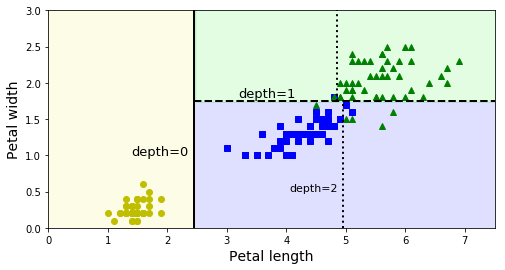

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False,
                          plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alph=0.8)
        
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='virginica')
        plt.axis(axes)
        
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
        
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, "depth=0", fontsize=13)
plt.text(3.2, 1.80, "depth=1", fontsize=13)
plt.text(4.05, 0.5, "depth=2", fontsize=11)
plt.show()

> * 굵은 수직선
    * 루트 노드의 결정경계 (꽃잎 길이=2.45cm)
    * 왼쪽 영역
        * 순수 노드이기 때문에 더 이상 나눌 수 없다.
    * 오른쪽 영역 
        * 깊이 1의 오른쪽 노드는 꽃잎 너비 = 1.75cm에서 나누어진다. (파선)
        * `max_depth=2`로 설정했기 때문에 더 결정 트리는 더 분할되지 않는다.  
        하지만 `max_depth=3`으로 하면 깊이 2의 두 노드가 결정 경계를 추가로 만든다.(점선)
        
> **모델 해석: 화이트박스와 블랙박스**  
* **화이트 박스**  
    * 위 결정 트리는 매우 직관적이고 결정 방식을 이해하기 쉽다.  
    이런 모델을 **화이트박스(white obx)** 모델이라고 한다.
    * 결정 트리는 필요하다면 수동으로 직접 따라 해볼 수도 있는 간단, 명확한 분류 방법을 사용한다.
* **블랙 박스**  
    * 반대로 랜덤 포레스트, 신경망은 **블랙박스(black box)** 모델이다.  
    * 블랙박스 모델 알고리즘들은 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있다.
    * 하지만 왜 그런 예측을 만드는지 쉽게 설명하기 어렵다.
    * ex) 신경망이 어떤 사람이 사진에 있다고 판단했을 때 무엇이 이런 예측을 낳게 했는지 파악하기 매우 어렵다. 모델이 그 사람의 눈을 인식한건지, 입 또는 코 또는 신발을 인식한건지, 그 사람이 앉아 있는 소파 때문인지 알기 어렵다.

# 3. 클래스 확률 추정
* 결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할 수도 있다.
* 먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고, 그 노드에 있는 클래스 $k$의 훈련 샘플의 비율을 반환한다.
* ex) 길이가 5cm, 너비가 1.5cm인 꽃잎을 발견했다고 가정  
이에 해당하는 리프 노드는 깊이 2에서 왼쪽 노드이므로, 결정트리는 그에 해당하는 확률을 출력한다.  
즉, 'setosa'는 $0\% (0/54)$, 'versicolor'는 $90.7\% (49/54)$, 'virginica'는 $9.3\% (5/54)$이다.  
당연히 클래스를 하나 예측한다면 가장 높은 확률을 가진 'vericolor'(클래스 1)를 출력할 것이다.

#### 예시 확인

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

추정된 확률은 결정 경계 그래프의 오른쪽 아래 사각형 안에서는 어느 위치든 동일하다. 
길이가 6cm, 너비가 1.5cm인 꽃잎도 확률이 같다. (사실 이 경우 'verginica'에 더 가까워 보인다.)

# 4. CART 훈련 알고리즘
* scikit-learn은 결정 트리를 훈련시키기 위해(즉, 트리를 성장시키기 위해) CART(Classification And Regression Tree) 알고리즘을 사용한다.

## 4.1. CART
* 훈련 세트를 하나의 특성 $k$의 임곗값 $t_k$를 사용해 두 개의 서브셋으로 나눈다.
* ex) 꽃잎 길이 ≤ 2.45cm

## 4.2. $k$와 $t_k$ 선택절차
* CART 비용함수를 이용해 반복하면서 (크기에 따른 가중치가 적용된) 가장 순수한 서브셋으로 나눌 수 있는 $(k, t_k)$짝을 찾는다.
> **분류에 대한 CART 비용 함수**  
이 알고리즘이 최소화해야 하는 비용 함수
$$ J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} $$
 * $G_{left/right}$ : 왼쪽/오른쪽 서브셋의 불순도
 * $m_{left/right}$ : 왼쪽/오른쪽 서브셋의 샘플 수

* 이 과정은 `max_depth`로 정의된 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈춘다.
* 뒤에 알아볼 다른 매개변수도 중지 조건에 관여한다. (`min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`)

> **주의**  
CATR 알고리즘은 **탐욕적 알고리즘(greedy algorithm)**이다.  
맨 위 루트 노드에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복한다.  
현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않는다.  
탐욕적 알고리즘은 종종 납득할만한 훌륭한 솔루션을 만들어내지만 최적의 솔루션을 보장하지는 않는다.

## 4.3. 최적의 트리 찾기
* 최적의 트리를 찾는 것은 **NP-완전 (NP-Complete)** 문제로 알려져 있다.  
이 문제는 $O(exp(m))$ 시간이 필요하고, 매우 작은 훈련 세트에도 적용하기 어렵다.  
그러므로 **'납득할만한 좋은 솔루션'**으로만 만족해야 한다.
> P : 다항 시간 안에 풀 수 있는 문제의 집합  
NP : 다항 시간 안에 답을 검증할 수 있는 문제의 집합  
NP-난해 (NP-Hard) : 모든 NP 문제를 다항 시간 안에 축소시킬 수 있는 문제  
NP-완전 : NP이면서 NP-난해인 문제  
대표적인 수한 분야의 미해결 문제 중 하나는 P=NP인지 아닌지이다. 대부분의 연구자는 P≠NP라고 생각한다.  
(P=NP이면 NP-완전도 P가 되어 다항 시간 안에 풀 수 있다.)
(P≠NP이면 NP-완전 문제를 위해 다항 시간 안에 풀 수 있는 알고리즘을 찾을 수 없다.)

# 5. 계산 복잡도
* 예측을 하려면 결정 트리를 root node에서 leaf node까지 탐색해야 한다.  
일반적으로 결정 트리를 탐색하기 위해 약 $O(log_2(m))$개의 node를 거쳐야 한다.
> * $log_2$는 밑이 2인 $log$이므로, $log_2(m) = log(m)/log(2)$  
  * 균형 이진 트리에서 깊이 $d$에서의 leaf node 개수는 $2^d$
  * leaf node가 훈련 데이터 수($m$)만큼 있다면 깊이는 $log_2(m)$

* 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다.
    * 각 node는 하나의 특성값만 확인하기 때문에 
    * 예측에 필요한 전체 복잡도는 특성 수와 무관하게 $O(log_2(m))$이다.
* 훈련 복잡도는 $O(n×mlog(m))$이다.
    * 각 node에서 모든 훈련 샘플의 모든 특성을 비교하기 때문에(또는 `max_features` 지정 시 그보다는 적은 특성)
* 훈련 세트가 (수천 개 이하 샘플 정도로) 작을 경우 scikit-learn은 (`presort=True`로 지정하면) 미리 데이터를 정렬하여 훈련 속도를 높일 수 있다. 하지만 훈련 세트가 클 경우 속도가 많이 느려진다.


# 6. 지니 불순도 또는 엔트로피?
* `criterion="entropy"`로 지정하면 엔트로피 불순도 사용 가능  
(default는 `criterion="gini"`)

## 6. 1. 엔트로피
* 불확실성의 측정  
* 메시지의 평균 정보 양을 측정하는 새넌의 정보 이론에서 모든 메시지가 동일할 때 엔트로피 = 0이 된다. 
* 머신러닝에서 불순도 측정 방법으로 자주 사용된다.
* 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피는 0이다.
* 엔트로피
$$ H_i = -\sum_{k=1, p_{i, k} ≠ 0}^np_{i, k}log_2(p_{i, k}) $$


* 위 결정 트리 그림의 깊이 2의 왼쪽 node의 엔트로피
$$ -\frac{49}{54}log_2(\frac{49}{54}) - \frac{5}{54}log_2(\frac{5}{54}) ≒ 0.445$$

## 6. 2. 지니 불순도 vs 엔트로피
* 지니 불순도와 엔트로피는 실제로 큰 차이가 없다. 둘 다 비슷한 트리를 만들어낸다.
* 지니 불순도가 조금 더 계산이 빨라 기본값으로 좋다.
* 그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지(branc)로 고립시키는 경향이 있다.
* 반면 엔트로피는 조금 더 균현 잡힌 트리를 만든다.

# 7. 규제 매개변수
* 결정 트리는 훈련 데이터에 대한 제약사항의 거의 없다. (선형 모델은 데이터가 선형일 거라 가정)
* 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽다.
* 결정 트리는 비파라미터 모델(nonparametric model)이라고 부르곤 한다.
    * 훈련되기 전에 파라미터 수가 결정되지 않기 때문에
    * 그래서 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭다.
* 선형 모델같은 파라미터 모델(parametric model)은 미리 정의된 모델 파라미터 수를 가진다.
    * 자유도가 제한되고 과대적합될 위험이 줄어든다.
    * 하지만 과소적합될 위험은 커진다.
    
## 7. 1. 규제 매개변수
* `max_depth` : 결정 트리의 최대 깊이 제어 (default는 None (제한 없음))
    * `max_depth`를 줄이면 모델을 규제하게 되고 과대적합의 위험이 감소한다.

#### 결정 트리의 형태를 제한하는 매개변수
* `min_samples_split` : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
* `min_samples_leaf` : 리프 노드가 가지고 있어야 할 최소 샘플 수
* `min_weight_fraction_leaf` : `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
* `max_leaf_nodes` : 리프 노드의 최대 수
* `max_features` : 각 노드에서 분할에 사용할 특성의 최대 수
* `min_impurity_decrease` : 분할로 얻어질 최소한의 불순도 감소량 지정
* `min_impurity_split` : 분할 대상이 되기 위해 필요한 최소한의 불순도 지정


`min_`으로 시작하는 매개변수를 증가시키거나, `max_`로 시작하는 매개변수를 감소시키면 모델에 규제가 커진다.

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'alph'
  s)
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'alph'
  s)


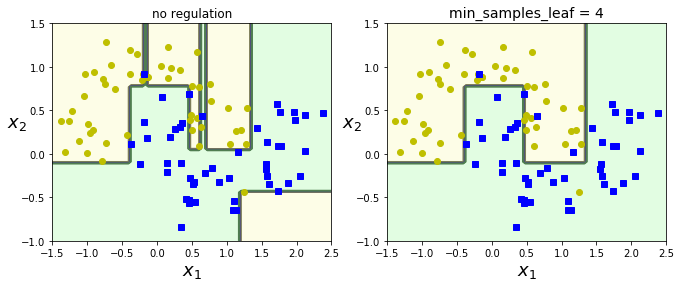

In [20]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], 
                       iris=False)
plt.title("no regulation")

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5],
                      iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), 
         fontsize=14)
plt.show()

> * **기본 매개변수를 사용한(규제가 없는) 모델 훈련 (왼쪽)**  
    * 과대적합되었다.  
* **`min_samples_leaf=4`로 지정한 모델 훈련 (오른쪽)**  
    * 일반화 성능이 더 좋을 것 같아 보인다.
    
> **가지치기(pruning)**  
* **사후 가지치기(post-pruning)**
    * 제한 없이 결정트리를 훈련시키고 불필요한 노드를 가지치기(제거)하는 알고리즘
* scikit-learn은 트리 생성을 미리 제한하는 **사전 가지치기(pre-pruning)**만 지원한다.
* 순도를 높이는 것이 **통계적으로 큰 효과가 없다면** leaf node 바로 위의 node는 불필요할 수 있다.
    * 대표적은 $\chi^2$ 검정같은 통계적 검정을 사용하여 우연히 향상된 것인지 추정한다. (귀무가설(null hypothesis)이라고 부른다.)
        * `sklearn.feature_selection.chi2` 함수에 구현되어 있다. 
        * 카이제곱 값이 커지만 $p$-값은 줄어든다.
    * 이 확률을 $p$-값이라 부르며, 어떤 임곗값(통상 5%)보다 높으면 그 node는 불필요한 것으로 간주되고 그 자식 node는 삭제된다.
        * $p$-값이 임곗값보다 높으면 순도 향상이 우연에 의한 것일 수 있다고 본다.
    * 가지치기는 불필요한 node가 모두 없어질 때까지 계속된다.

# 8. 회귀
#### noise가 섞인 2차 함수 형태의 데이터셋에서 `max_depth=2` 설정으로 회귀 트리 만들기

In [27]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X -0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [28]:
def plot_regression_predictions(tree_reg, X, y, axes=[0,1,-0.2,1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

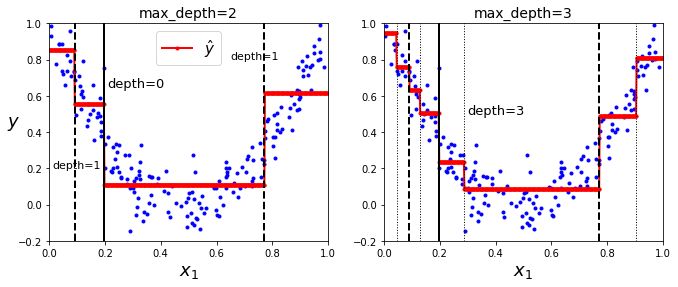

In [42]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "depth=0", fontsize=13)
plt.text(0.01, 0.2, "depth=1", fontsize=11)
plt.text(0.65, 0.8, "depth=1", fontsize=11)
plt.legend(loc="upper center", fontsize=15)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "depth=3", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

> 각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 된다.  
알고리즘은 예측값과 가능한 한 많은 샘플이 가가이 있도록 영역을 분할한다.

In [43]:
export_graphviz(
    tree_reg1,
    out_file=image_path("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

In [47]:
import graphviz

with open("../../images/regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.fotmat = 'png'
#dot.render(filename='regression_tree', directory="../../images", cleanup=True)
#dot

> 분류기와 차이점은 각 node에서 클래스를 예측하는 대신 어떤 값을 예측한다.  
ex)   
$x_1 = 0.6$인 샘플의 클래스를 예측한다고 가정
트리를 순회하면 value=0.1106인 leaf node에 도달한다.  
이 leaf node에 있는 110개 훈련 샘플의 평균 타깃값이 예측값이 된다.  
이 예측값을 사용해 110개 샘플에 대한 평균제곱오차(MSE)를 계산하면 0.0151이 된다.

## 8. 1. 회귀를 위한 CART
* 분류에서 CART 알고리즘 : 훈련 세트를 불순도를 최소화하는 방향으로 분할  
회귀에서 CART 알고리즘 : 평균제곱오차(MSE)를 최소화하도록 분할

#### 회귀를 위한 CART 비용함수
$$ J(k, t_k) = \frac{m_{\mbox{left}}}{m}\mbox{MSE}_{\mbox{left}} + \frac{m_{\mbox{right}}}{m}\mbox{MSE}_{\mbox{right}} $$

여기서,  
$$ \mbox{MSE}_{\mbox{node}} = \sum_{i∈\mbox{node}}(\hat y_{\mbox{node}} - y_i)^2 $$

$$ \hat y_{\mbox{node}} = \frac{1}{m_{\mbox{node}}}\sum_{i∈\mbox{node}}y_i $$

## 8. 2. 회귀 규제

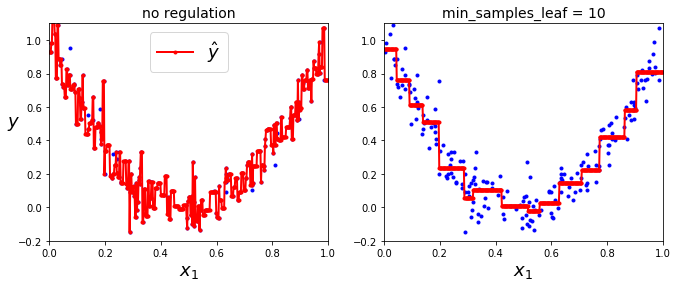

In [55]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1 , 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred1, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.legend(loc='upper center', fontsize=18)
plt.title('no regulation', fontsize=14)

plt.subplot(122)
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred2, 'r.-', linewidth=2, label=r'\hat {y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.title('min_samples_leaf = {}'.format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()

# 9. 불안정성

## 9. 1.  결정 트리는 계단 모양의 결정 경계를 만든다.
* 모든 분할은 축에 수직
* 그래서 훈련 세트의 회전에 민감하다.

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'alph'
  s)


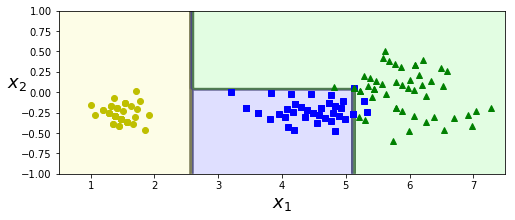

In [64]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], 
                            [np.sin(angle), np.cos(angle)]])
X = iris.data[:, 2:] # Petal length, Petal width
y = iris.target
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)
plt.show()

#### 훈련 세트의 회전에 민감한 결정 트리

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'alph'
  s)
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'alph'
  s)


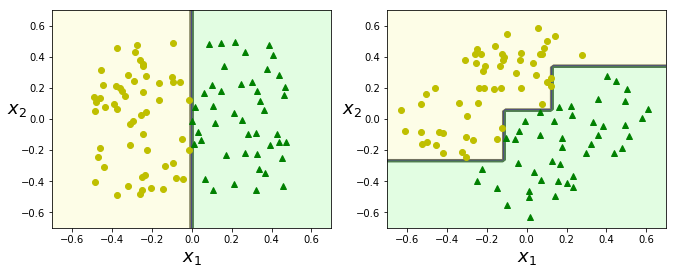

In [65]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

> * 왼쪽 결정 트리
    * 쉽게 데이터셋 구분
* 데이터셋을 45도 회전한 오른쪽 결정 트리
    * 잘 일반화될 것 같지 않다.

#### 이런 문제를 해결하는 방법
훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용하는 것

## 9.2. 훈련 데이터에 있는 작은 변화에도 매우 민감하다.
* 결정트리의 주된 문제로 결정 경계가 매우 달라진다.

#### 가장 넓은 versicolor를 제거하고 결정트리 훈련시키기

In [66]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 꽃잎 너비가 큰 versicolor

array([[4.8, 1.8]])

In [67]:
not_widest_versicolor = (X[:, 1] != 1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

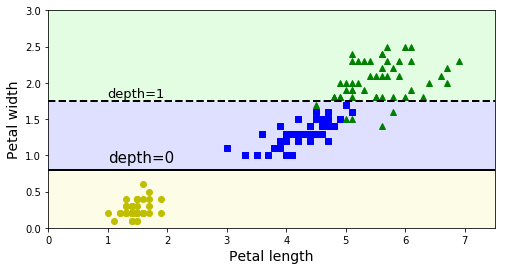

In [68]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "depth=0", fontsize=15)
plt.text(1.0, 1.80, "depth=1", fontsize=13)

plt.show()

> 2.2. 결정경계 절의 처음 결정경계와 매우 다르다.

* 사실 scikit-learn의 훈련 알고리즘은 확률적이기 때문에 (`random_state`를 지정하지 않으면) 같은 훈련 데이터에서도 다른 모델을 얻게 될 수 있다.
> 각 노드에서 평가할 후보 특성을 무작위로 선택한다.  
`DecisionTreeClassifier`와 `DecisionTreeRegressor`는 `max_features`에서 분할에 사용할 특성의 최대 개수를 지정할 수 있다.  
데이터셋의 특성 개수보다 작게 설정하면 무작위로 일부 특성이 선택된다. (기본값은 None - 전체 특성 개수 사용)
* 랜덤 포레스트는 많은 트리에서 만든 예측을 평균하여 이런 불안정성을 극복할 수 있다.

# 연습문제
## 1.
백만 개의 샘플을 가진 훈련 세트에서 (규제없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?

$m$개의 leaf node를 포함한 균형이 잘 잡힌 이진 트리의 깊이는 $log_2(m)$을 반올림한 것과 같다. ($log_2(m)$는 이진 로그이고, $log_2(m) = log(m)/log(2)$이다.)  
이진 결정 트리를 제한을 두지 않고 훈련시키면 훈련 샘플마다 하나의 leaf node가 되므로 어느 정도 균형이 잘 잡힌 트리가 된다. 따라서 훈련 세트에 백만 개 샘플이 있다면 결정 트리의 깊이는  $log_2(10^6) ≒ 20$이 될 것이다. (실제로는 완벽하게 균형 잡힌 트리가 만들어지지 않기 때문에 조금 더 늘어난다.

## 2. 
한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?

일반적으로 한 노드의 지니 불순도는 부모의 불순도보다 낮다. 이는 자식의 지니 불순도의 가중치 합이 최소화되는 방향으로 각 노드를 분할하는 CART 훈련 알고리즘의 비용 함수 때문이다. 그러나 다른 자식 노드의 지니 불순도 감소량이 어떤 노드의 불순도 증가량보다 큰 경우라면 부모의 불순도보다 큰 노드가 생길 수 있다.  
예를 들어 클래스 A의 샘플 4개, B의 샘플 1개를 포함한 노드를 생각해 볼 때, 이 노드의 지니 불순도는 $1 - (\frac{1}{5})^2 - (\frac{4}{5})^2 = 0.32$이다. 이 데이터셋은 1차원이고 A, B, A, A, A 순으로 늘어서 있다고 가정하면 알고리즘이 이 노드를 두 번째 샘플 이후에 나누너 샘플 A, B를 가진 자식 노드와 샘플 A, A, A를 가진 자식 노드를 만든다. 첫 번째 자식 노드의 지니 불순도는 $1 - (\frac{1}{2})^2 - (\frac{1}{2})^2 = 0.5$가 되어 부모보다 크다. 이는 다른 노드가 순수 되는 것에 대한 대가이다. 가중치를 전체 지니 불순도는 $\frac{2}{5}×0.5-\frac{3}{5}×0=0.2$가 되어 부모의 지니 불순도보다 낮다.

## 3. 
결정 트리가 훈련 세트에 과대적합되었다면 `max_depth`를 줄이는 것이 좋을까요?

모델에 제약을 가해 규제해야 하므로 `max_depth`를 낮추는 것이 좋다.

## 4.
결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까요?

결정 트리는 훈련 데이터의 스케일이나 원점에 맞추어져 있는지 상관하지 않는다. 이것이 결정 트리의 장점 중 하나이다. 그러므로 결정 트리가 훈련 세트에 과소적합되었다고 입력 특성의 스케일을 조정하는 것은 시간 낭비이다.

# 5. 
백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면 천만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데는 대략 얼마나 걸릴까요?

결정 트리 훈련의 계산 복잡도는 $O(n×mlog(m))$이다. 그러므로 훈련 세트의 크기에 10을 곱하면 훈련 시간은 $K = (n×10m×log(10m))/(n×m×log(m)) = 10×log(10m)/log(m)$배 늘어난다. 만약 $m=10^6$이면 $K≒11.7$이므로 훈련에 대략 11.7시간이 걸릴 것으로 예상할 수 있다.

# 6.
십만 개의 샘플을 가진 훈련 세트가 있다면 `presort=True`로 지정하는 것이 훈련 속도를 높일까요?

샘플 수가 수천 개 미만일 때 훈련 세트를 사전에 정렬하여 훈련 속도를 높일 수 있다. 1000,000개 샘플일 때 `presort=True`로 지정하면 훈련 속도가 매우 느려질 것이다.

## 7.
moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.  
a. `make_moons(n_samples=1000, noise=0.4)`를 사용해 데이터셋을 생성합니다.

In [69]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 이를 `train_test_split()`을 사용해 훈련 세트와 테스트 세트로 나눕니다.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

c. `DecisionTreeClassifier`의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(`GridSearchCV`를 사용하면 됩니다).  
힌트: 여러 가지 `max_leaf_nodes` 값을 시도해보세요.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params,
                                                    cv=3, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    6.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       s

In [74]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.
> 기본적으로 `GridSearchCV`는 전체 훈련 세트로 찾은 최적의 모델을 다시 훈련시킨다(`refit=False`로 지정해서 바꿀 수 있다). 그래서 별도로 작업할 필요가 없다. 모델의 정확도를 바로 평가할 수 있다.

In [75]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 8.
랜덤 포레스트를 만들어보세요.  
a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다.  
힌트 : 사이킷런의 `ShuffleSplit`을 사용할 수 있습니다.

In [76]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                 random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.

In [78]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8054499999999999

c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다.(scipy의 `mode()` 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 다수결 예측(majority-vote prediction)이 만들어집니다.

In [79]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [80]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5 ~ 1.5%정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다.

In [81]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872